In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stat

In [28]:
p_data = []
for participant in range(4, 96):
    try:
        p_dataframe = pd.read_csv('data/'+str(participant)+'.csv')
        p_dataframe['p_no'] = participant
        p_data.append(p_dataframe)
        
    except:
        print(participant)

11
27
28
33
46
47
48
49
54


In [61]:
data = pd.concat(p_data)

In [62]:
len(p_data)

83

In [63]:
data_choice = data[data['key_resp.rt'].notna()]

In [64]:
data_choice['block no.'] = np.tile(np.repeat(np.arange(1, 31), 30), len(p_data))

C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\3202552857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['block no.'] = np.tile(np.repeat(np.arange(1, 31), 30), len(p_data))


In [65]:
data_choice['switch type'] = 'reward'
data_choice.loc[data_choice['p_no']%2 != 0, 'switch type'] = 'transition'

C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\799418867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['switch type'] = 'reward'


In [66]:
data_choice['infect key change'] = 'yes'
data_choice.loc[((data_choice['switch type'] == 'reward') & (data_choice['p_no'] > 50)), 'infect key change'] = 'no'
data_choice.loc[((data_choice['switch type'] == 'transition') & (data_choice['p_no'] < 50)), 'infect key change'] = 'no'


C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\986198175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['infect key change'] = 'yes'


In [67]:
data_choice.loc[:, 'boundary node?'] = 'no'
data_choice.loc[((data_choice['index'] == 1.0) |
                 (data_choice['index'] == 5.0) |
                 (data_choice['index'] == 6.0) |
                 (data_choice['index'] == 10.0) |
                 (data_choice['index'] == 11.0) |
                 (data_choice['index'] == 15.0)
                ),
                'boundary node?'] = 'yes'

C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\2784336044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice.loc[:, 'boundary node?'] = 'no'


In [68]:
## Labeling post transition boundaries
post_transition_boundary = np.zeros(len(data_choice), dtype = object)
prev_node = None
node_counter = 0
post_transition_boundary[0] = 'no'
for curr_node, next_node in zip(data_choice['boundary node?'].values[:-1], data_choice['boundary node?'].values[1:]):
    node_counter = node_counter+1
    if curr_node == 'yes' and next_node == 'yes':
        post_transition_boundary[node_counter] = 'yes'
    else:
        post_transition_boundary[node_counter] = 'no'
data_choice['post transition node'] = post_transition_boundary  
data_choice.loc[((data_choice['post transition node'] == 'yes') & (data_choice['boundary node?'] == 'yes')), 'node type'] = 'community receiver'
data_choice.loc[((data_choice['post transition node'] == 'no') & (data_choice['boundary node?'] == 'yes')), 'node type'] = 'community sender'
data_choice.loc[((data_choice['post transition node'] == 'no') & (data_choice['boundary node?'] == 'no')), 'node type'] = 'community node'


C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\318945277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['post transition node'] = post_transition_boundary
C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\318945277.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice.loc[((data_choice['post transition node'] == 'yes') & (data_choice['boundary node?'] == 'yes')), 'node type'] = 'community receiver'


In [69]:
data_choice.loc[((data_choice['index'] == 3) | (data_choice['index'] == 8) & (data_choice['switch type'] == 'transition')), 'node type'] = 'Transition infected node'
data_choice.loc[((data_choice['index'] == 2) | (data_choice['index'] == 13) & (data_choice['switch type'] == 'reward')), 'node type'] = 'Reward infected node'
data_choice.loc[(data_choice['block no.'] <= 20), 'stage'] = 'pre infection'
data_choice.loc[(data_choice['block no.'] > 20), 'stage'] = 'post infection'


C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\1307958866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice.loc[(data_choice['block no.'] <= 20), 'stage'] = 'pre infection'


In [70]:
#Remove RT outliers
data_choice = data_choice[data_choice['key_resp.rt'] < 10]

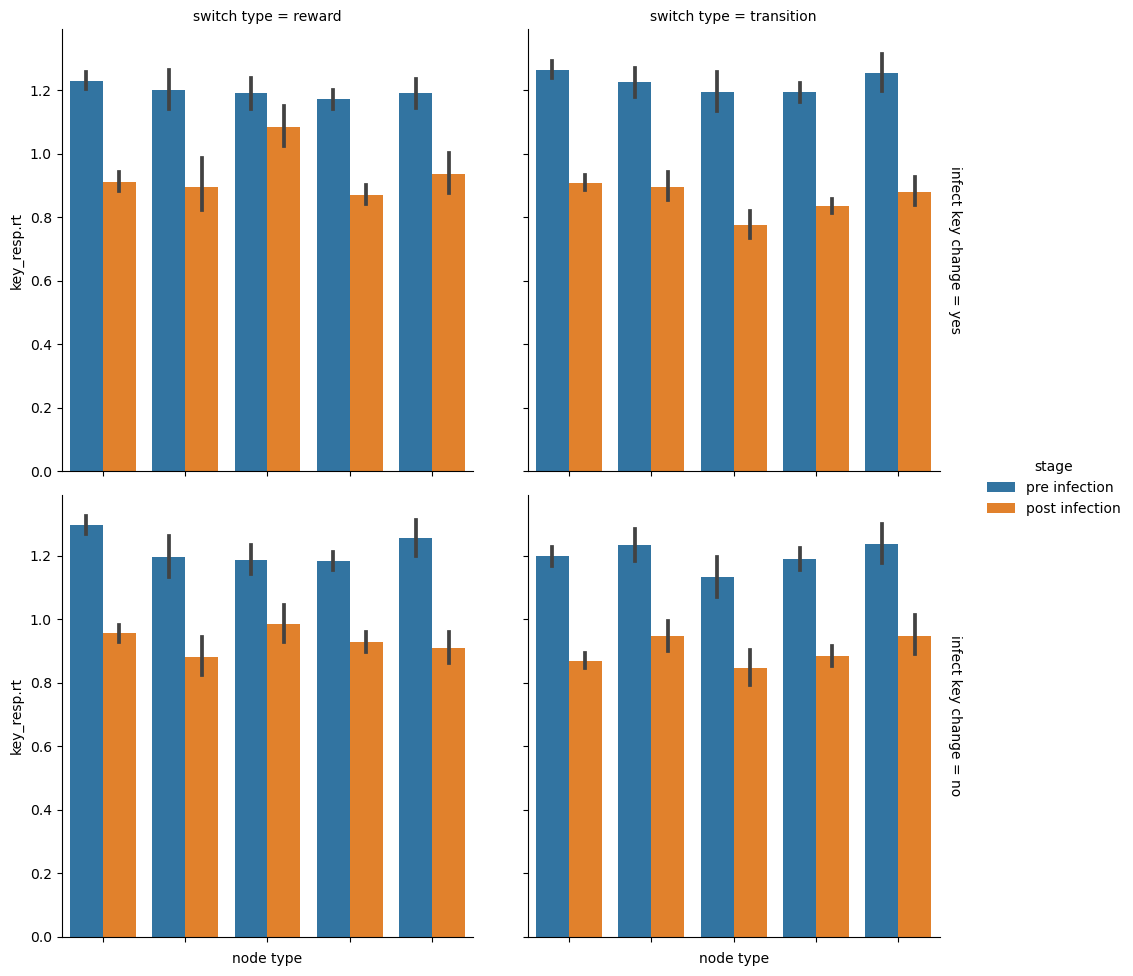

In [39]:
g = sns.catplot(x = 'node type', y = 'key_resp.rt', col = 'switch type', hue = 'stage', row = 'infect key change',
           data = data_choice,
           kind = 'bar', margin_titles = True)#, row_order = ['yes', 'no'])
g.set_xticklabels(rotation = 90)

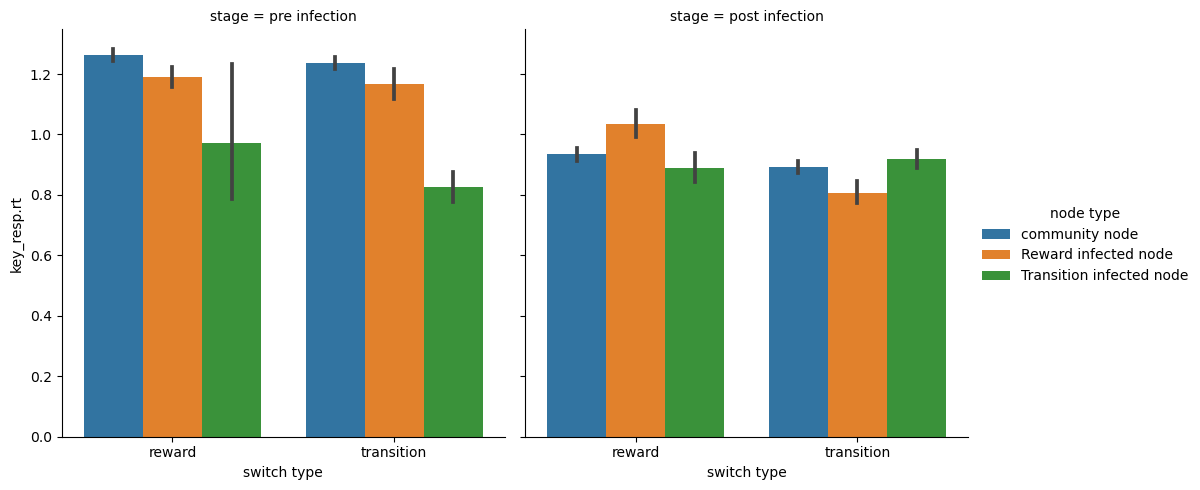

In [40]:
g = sns.catplot(y = 'key_resp.rt', x = 'switch type', col = 'stage', hue = 'node type', 
           data = data_choice.loc[((data_choice['block no.'] >= 20) & (data_choice['node type'] == 'Transition infected node') | (data_choice['node type'] == 'Reward infected node') | (data_choice['node type'] == 'community node'))],  
           kind = 'bar')
# g.set('block 1')

In [71]:
data_choice['meta_node_type'] = 'other_nodes'
data_choice.loc[(((data_choice['node type'] == 'Transition infected node') | (data_choice['node type'] == 'community node')) & (data_choice['switch type'] == 'reward')), 'meta_node_type'] = 'uninfected'
data_choice.loc[(((data_choice['node type'] == 'Reward infected node') | (data_choice['node type'] == 'community node')) & (data_choice['switch type'] == 'transition')), 'meta_node_type'] = 'uninfected'
data_choice.loc[((data_choice['node type'] == 'Transition infected node') & (data_choice['switch type'] == 'transition')), 'meta_node_type'] = 'infected'
data_choice.loc[((data_choice['node type'] == 'Reward infected node') & (data_choice['switch type'] == 'reward')), 'meta_node_type'] = 'infected'


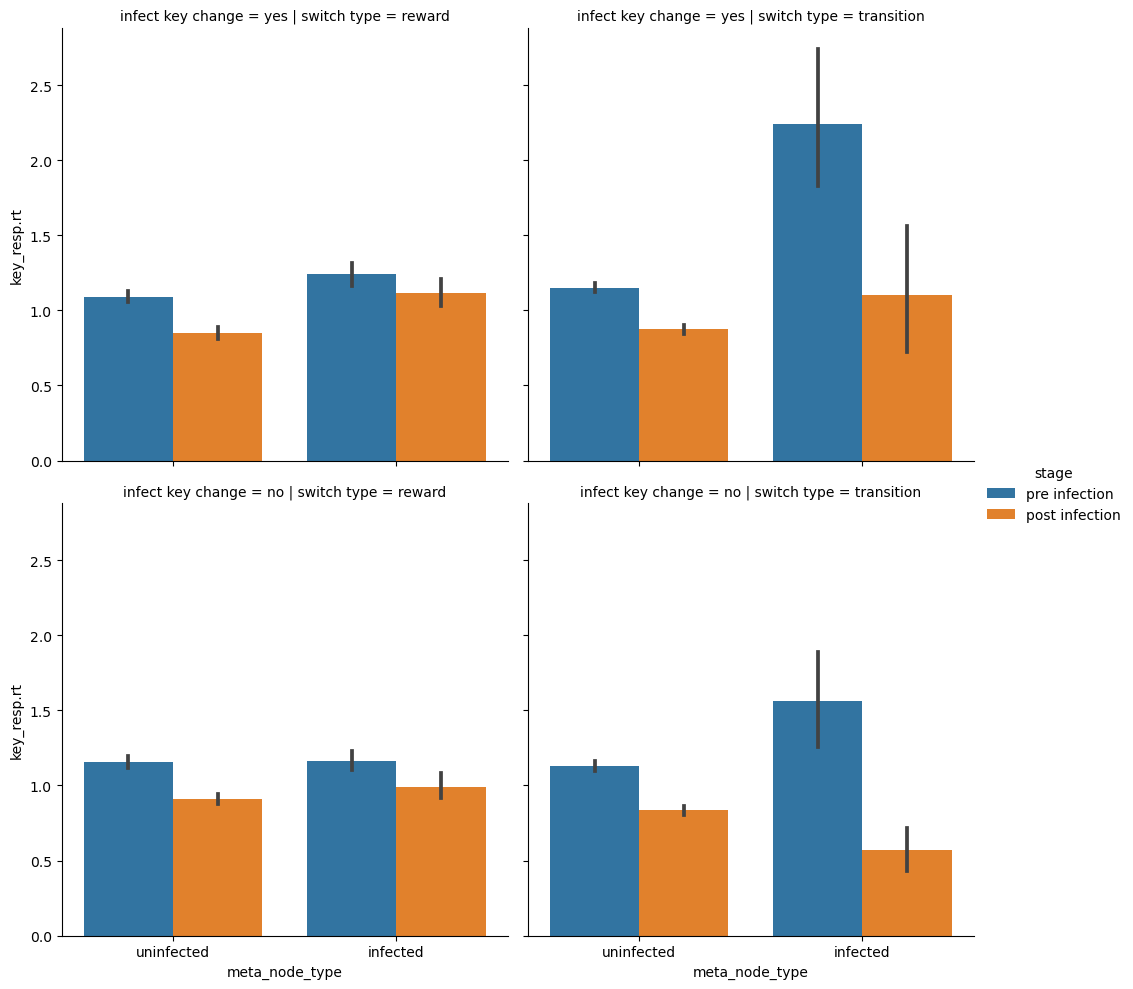

In [42]:
g = sns.catplot(y = 'key_resp.rt', row = 'infect key change', col = 'switch type', hue = 'stage', x = 'meta_node_type', 
           data = data_choice.loc[data_choice['correct_answer'] == data_choice['key_resp.keys']], order = ['uninfected', 'infected'],  
           kind = 'bar')
# g.set('block 1')
plt.show()

In [72]:
# data_choice = data_choice[data_choice['correct_answer'] == data_choice['key_resp.keys']]
data_choice_averaged = data_choice.groupby(["p_no", "switch type", 'meta_node_type', 'stage', 'infect key change']).mean().reset_index()

C:\Users\tejas\AppData\Local\Temp\ipykernel_4800\3589950318.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_choice_averaged = data_choice.groupby(["p_no", "switch type", 'meta_node_type', 'stage', 'infect key change']).mean().reset_index()


In [73]:
data_choice

,index,stimulus,correct_answer,stimulus_selector.thisRepN,stimulus_selector.thisTrialN,stimulus_selector.thisN,stimulus_selector.thisIndex,trials.thisRepN,trials.thisTrialN,trials.thisN,...,Unnamed: 99,Unnamed: 94,block no.,switch type,infect key change,boundary node?,post transition node,node type,stage,meta_node_type
5,4.0,stimuli/4.png,l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,reward,yes,no,no,community node,pre infection,uninfected
6,3.0,stimuli/3.png,l,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,1,reward,yes,no,no,Transition infected node,pre infection,uninfected
7,2.0,stimuli/2.png,s,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,1,reward,yes,no,no,Reward infected node,pre infection,infected
8,1.0,stimuli/1.png,s,0.0,0.0,0.0,0.0,0.0,3.0,3.0,...,NaN,NaN,1,reward,yes,yes,no,community sender,pre infection,other_nodes
9,3.0,stimuli/3.png,l,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,NaN,NaN,1,reward,yes,no,no,Transition infected node,pre infection,uninfected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,14.0,stimuli/14.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,transition,yes,no,no,community node,post infection,uninfected
1243,11.0,stimuli/11.png,l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,transition,yes,yes,no,community sender,post infection,other_nodes
1244,13.0,stimuli/13.png,l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,transition,yes,no,no,community node,post infection,uninfected
1245,15.0,stimuli/15.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,transition,yes,yes,no,community sender,post infection,other_nodes


In [75]:
sum(data_choice_averaged.stage == 'pre infection')

249

In [76]:
data_choice_averaged['post_minus_pre_infection'] = np.repeat(data_choice_averaged.loc[data_choice_averaged['stage'] == 'post infection', 'key_resp.rt'].values - data_choice_averaged.loc[data_choice_averaged['stage'] == 'pre infection', 'key_resp.rt'].values, 2)
data_choice_averaged['post_minus_pre_infection'] = data_choice_averaged['post_minus_pre_infection'] + 0.5


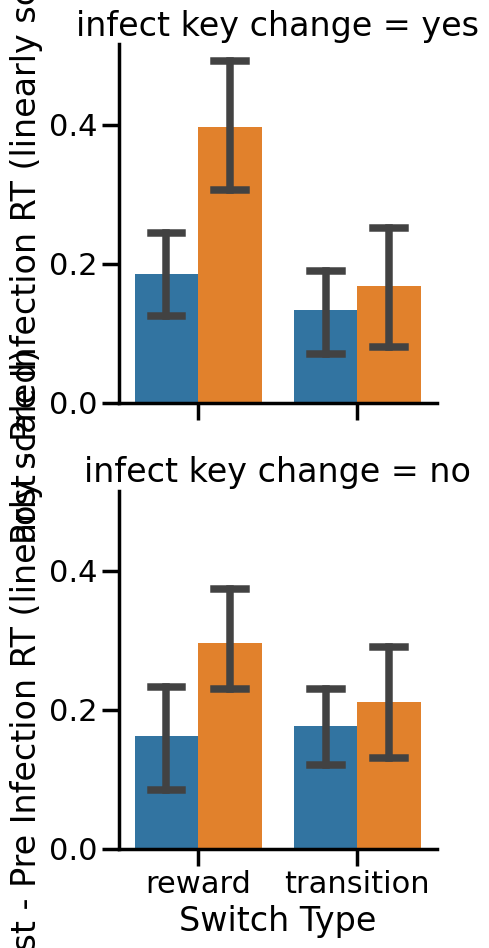

In [96]:
sns.set_context('poster')
g = sns.catplot(y = 'post_minus_pre_infection', row = 'infect key change', x = 'switch type',  hue = 'meta_node_type', 
           data = data_choice_averaged, hue_order = ['uninfected', 'infected'],  legend = False,
           kind = 'bar', capsize = 0.2)
g.set_xlabels('Switch Type')
g.set_ylabels('Post - Pre Infection RT (linearly scaled)')
# sns.move_legend(g.axes[1][0], 'center right')

# plt.legend(title = 'Node Type', loc = 'right')
# plt.tight_layout()
plt.savefig('results.png', dpi = 600, bbox_inches = 'tight')
# g.set('block 1')

In [156]:
stat.ttest_ind(data_choice.loc[((data_choice['block no.'] >= 20) & (data_choice['switch type'] == 'transition') & (data_choice['meta_node_type'] == 'infected')), 'rt'], data_choice.loc[((data_choice['block no.'] >= 20) & (data_choice['switch type'] == 'transition') & (data_choice['meta_node_type'] == 'uninfected')), 'rt'])

Ttest_indResult(statistic=2.8321713949434884, pvalue=0.004649299843249827)

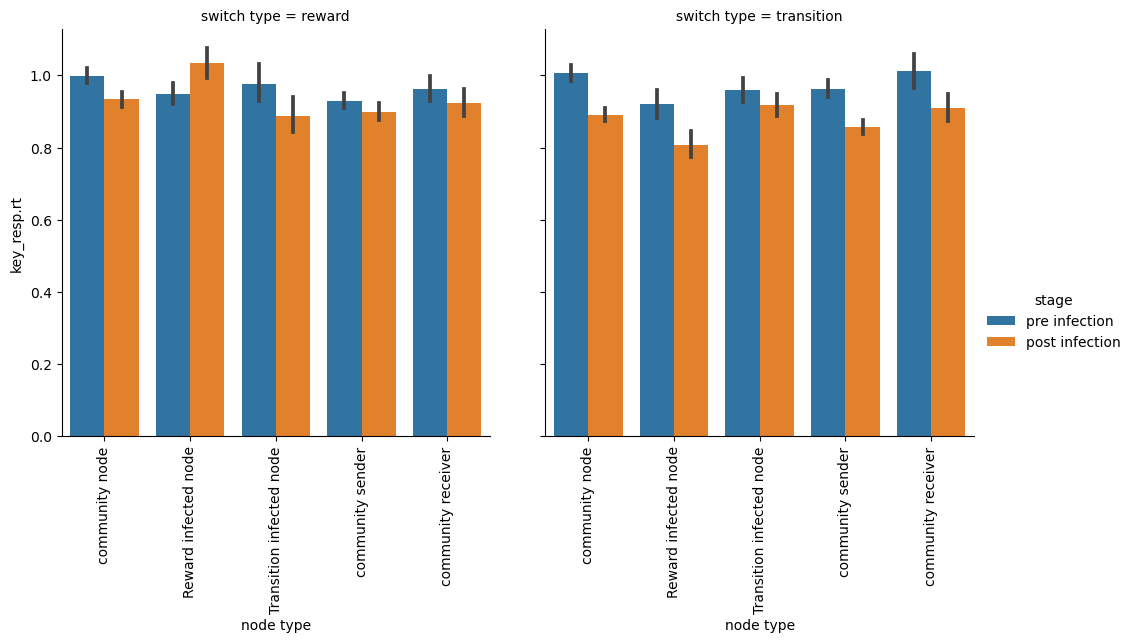

In [63]:
g = sns.catplot(y = 'key_resp.rt', col = 'switch type', hue = 'stage', x = 'node type', 
           data = data_choice.loc[((data_choice['block no.'] >= 10))],   
           kind = 'bar')
g.set_xticklabels(rotation=90)
# g.set('block 1')

In [148]:
data_choice['switch_type'] = data_choice['switch type']
data_choice['node_type'] = data_choice['node type']
data_choice['rt'] = data_choice['key_resp.rt']

In [35]:
data_choice_averaged['switch_type'] = data_choice_averaged['switch type']
# data_choice_averaged['node_type'] = data_choice_averaged['node type']
data_choice_averaged['rt'] = data_choice_averaged['key_resp.rt']
data_choice_averaged['infect_key_change'] = data_choice_averaged['infect key change']

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('post_minus_pre_infection ~ C(switch_type)*C(meta_node_type)*C(infect_key_change)', 
         data = data_choice_averaged.reset_index()).fit()
table = sm.stats.anova_lm(lm, type=2)

In [39]:
table

,df,sum_sq,mean_sq,F,PR(>F)
C(switch_type),1.0,0.755584,0.755584,13.398037,0.000279
C(meta_node_type),2.0,0.977582,0.488791,8.667261,0.000200
C(infect_key_change),1.0,0.003511,0.003511,0.062265,0.803056
C(switch_type):C(meta_node_type),2.0,0.438092,0.219046,3.884134,0.021207
C(switch_type):C(infect_key_change),1.0,0.223669,0.223669,3.966103,0.046984
C(meta_node_type):C(infect_key_change),2.0,0.090414,0.045207,0.801613,0.449197
C(switch_type):C(meta_node_type):C(infect_key_change),2.0,0.053770,0.026885,0.476723,0.621104
Residual,486.0,27.408027,0.056395,NaN,NaN


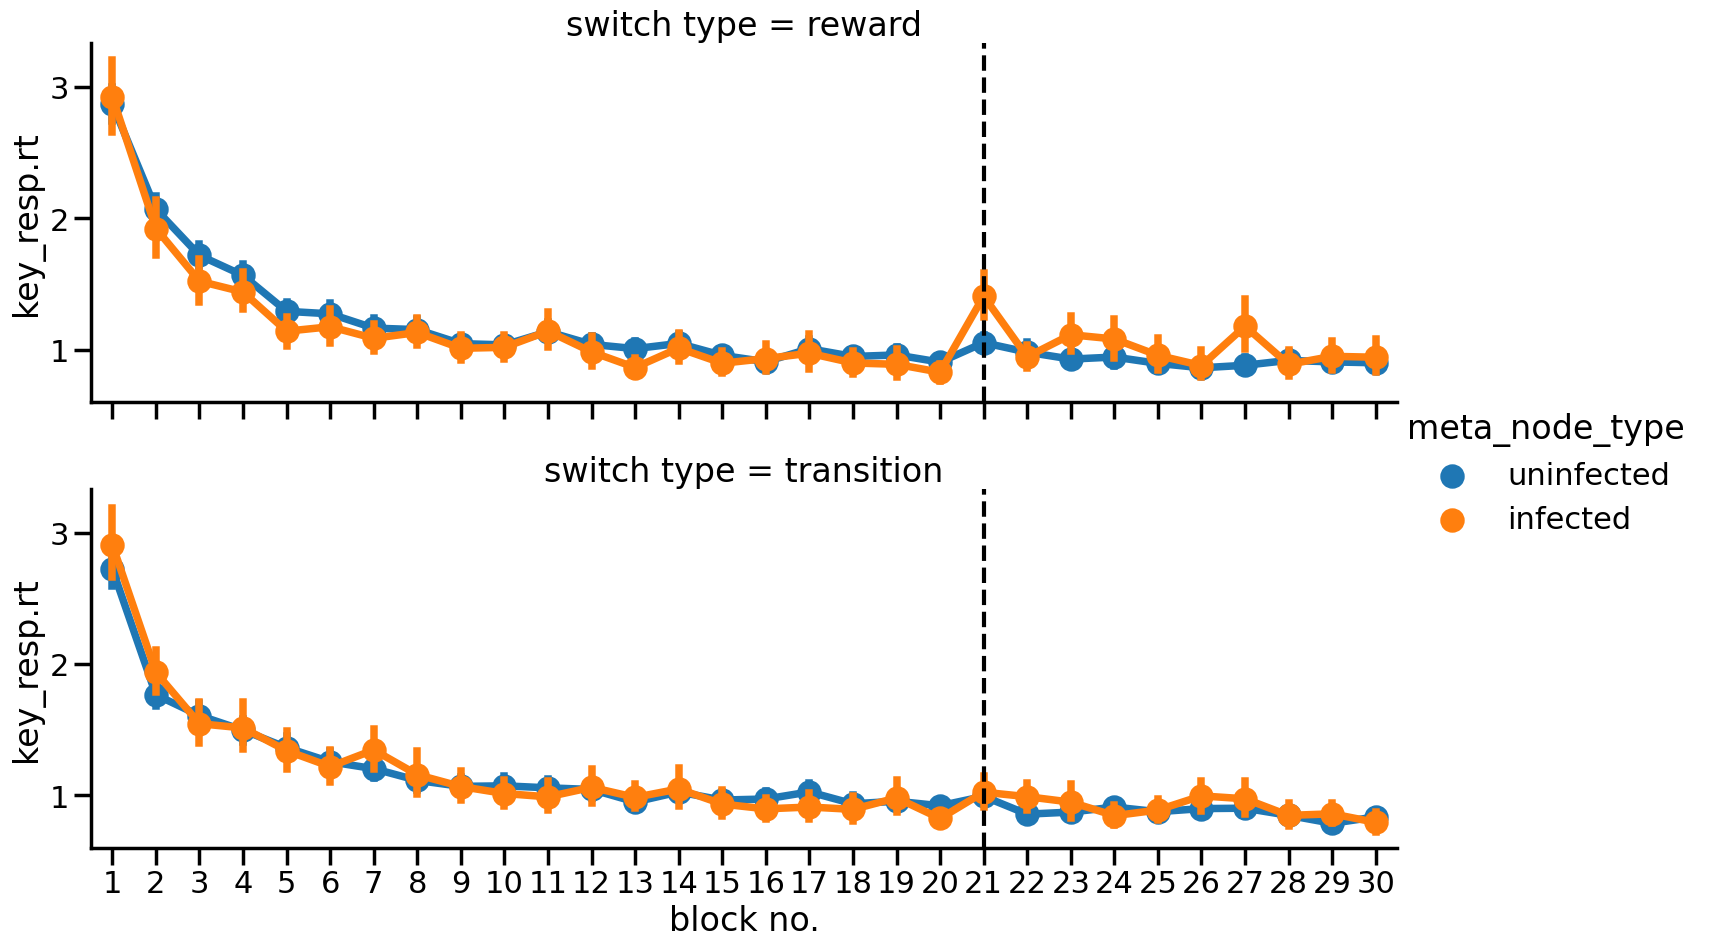

In [111]:
sns.set_context('poster')

g = sns.catplot(hue = 'meta_node_type', y = 'key_resp.rt', row= 'switch type', x = 'block no.', 
           data = data_choice, hue_order = ['uninfected', 'infected'], 
           kind = 'point', height = 5, aspect = 3)#, hue_order=['community node', 'community sender', 'community receiver'])
# g.set_xticklabels(rotation = 90)
for i in range(2):
    g.axes[i][0].axvline(x = 20, ls = '--', color = 'black')

plt.savefig('RT plot.png', dpi = 600)

In [91]:
data_choice.loc[data_choice['node type'] == 'community sender', 'node type'] = 'community node'

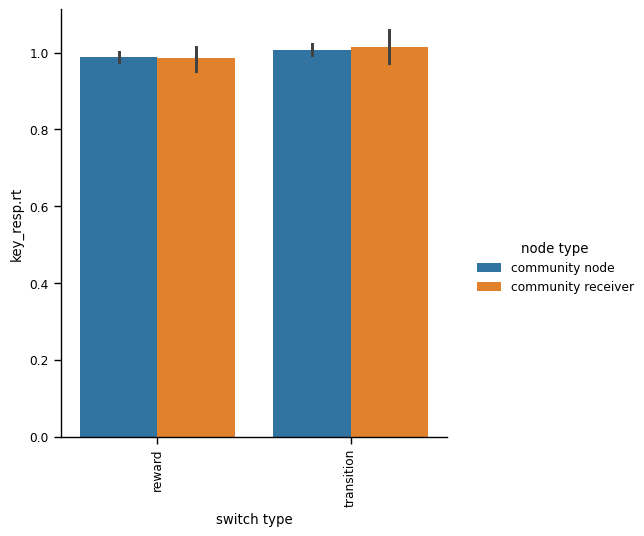

In [93]:
sns.set_context('paper')
g = sns.catplot(hue = 'node type', y = 'key_resp.rt', x= 'switch type', 
           data = data_choice.loc[((data_choice['block no.'] >= 8) & (data_choice['block no.'] <= 20))],  
           margin_titles = True, kind = 'bar', hue_order=['community node','community receiver'])
g.set_xticklabels(rotation = 90)
# for i in range(5):
#     g.axes[i].axvline(x = 20, ls = '--', color = 'black')

In [197]:
data_choice['accuracy'] = data_choice['correct_answer'] == data_choice['key_resp.keys']

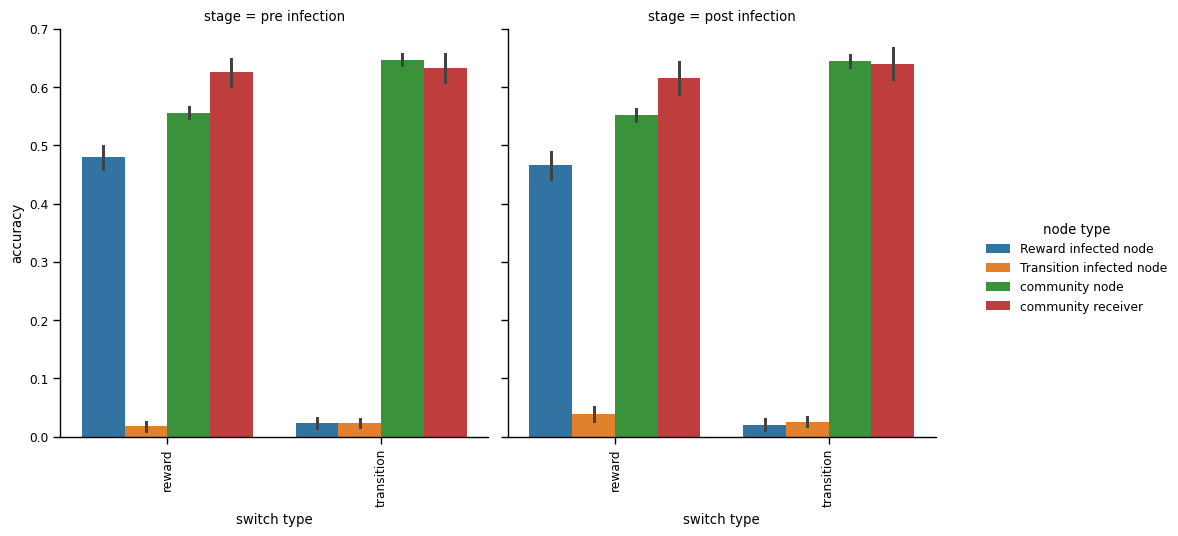

In [206]:
sns.set_context('paper')
g = sns.catplot(hue = 'node type', y = 'accuracy', x= 'switch type', 
           data = data_choice.loc[((data_choice['block no.'] >= 8))],  col = 'stage',
           margin_titles = True, kind = 'bar')
g.set_xticklabels(rotation = 90)
# for i in range(5):
#     g.axes[i].axvline(x = 20, ls = '--', color = 'black')

In [175]:
data_parse = data[data['parse_stim.started'].notna()].reset_index()

In [176]:
data_parse.loc[:, 'boundary node?'] = 'no'
data_parse.loc[((data_parse['index'] == 1.0) |
                 (data_parse['index'] == 5.0) |
                 (data_parse['index'] == 6.0) |
                 (data_parse['index'] == 10.0) |
                 (data_parse['index'] == 11.0) |
                 (data_parse['index'] == 15.0)
                ),
                'boundary node?'] = 'yes'

In [177]:
data_parse['block no.'] = np.tile(np.repeat(np.arange(1, 21), 30), len(p_data))

In [178]:
data_parse['key pressed'] = 0
data_parse.loc[data_parse['parse_key_resp.keys']=='space', 'key pressed'] = 1


In [185]:
indices = data_parse[data_parse['key pressed'] == 1].index - 1

In [186]:
data_parse.loc[indices, 'key pressed'] = 1

In [188]:
## Labeling post transition boundaries
post_transition_boundary = np.zeros(len(data_parse), dtype = object)
prev_node = None
node_counter = 0
post_transition_boundary[0] = 'no'
for curr_node, next_node in zip(data_parse['boundary node?'].values[:-1], data_parse['boundary node?'].values[1:]):
    node_counter = node_counter+1
    if curr_node == 'yes' and next_node == 'yes':
        post_transition_boundary[node_counter] = 'yes'
    else:
        post_transition_boundary[node_counter] = 'no'
data_parse['post transition node'] = post_transition_boundary  
data_parse.loc[((data_parse['post transition node'] == 'yes') & (data_parse['boundary node?'] == 'yes')), 'node type'] = 'community receiver'
data_parse.loc[((data_parse['post transition node'] == 'no') & (data_parse['boundary node?'] == 'yes')), 'node type'] = 'community sender'
data_parse.loc[((data_parse['post transition node'] == 'no') & (data_parse['boundary node?'] == 'no')), 'node type'] = 'community node'


In [189]:
data_parse['switch type'] = 'reward'
data_parse.loc[data_parse['p_no']%2 != 0, 'switch type'] = 'transition'

data_parse.loc[((data_parse['index'] == 3) | (data_parse['index'] == 8) & (data_parse['switch type'] == 'transition')), 'node type'] = 'Transition infected node'
data_parse.loc[((data_parse['index'] == 2) | (data_parse['index'] == 13) & (data_parse['switch type'] == 'reward')), 'node type'] = 'Reward infected node'
data_parse.loc[(data_parse['block no.'] <= 10), 'stage'] = 'pre infection'
data_parse.loc[(data_parse['block no.'] > 10), 'stage'] = 'post infection'


In [190]:
data_parse_proportion = data_parse.groupby(by = ['p_no', 'boundary node?', 'node type', 'block no.', 'switch type', 'stage']).mean().reset_index()

C:\Users\tejas\AppData\Local\Temp\ipykernel_6312\447090241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_parse_proportion = data_parse.groupby(by = ['p_no', 'boundary node?', 'node type', 'block no.', 'switch type', 'stage']).mean().reset_index()


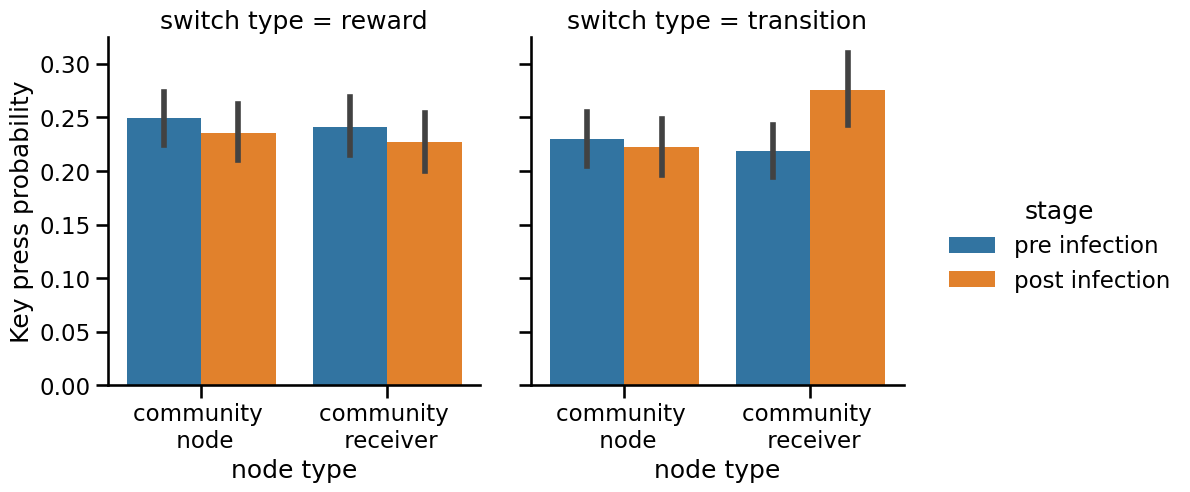

In [184]:
sns.set_context('talk')
g = sns.catplot(x = 'node type', y = 'key pressed',  col = 'switch type', hue = 'stage',
           data = data_parse_proportion, order = ['community node', 'community receiver'],
           kind = 'bar', margin_titles = True)
g.set(ylabel='Key press probability')
g.set_xticklabels(['community \n node', 'community \n receiver'])

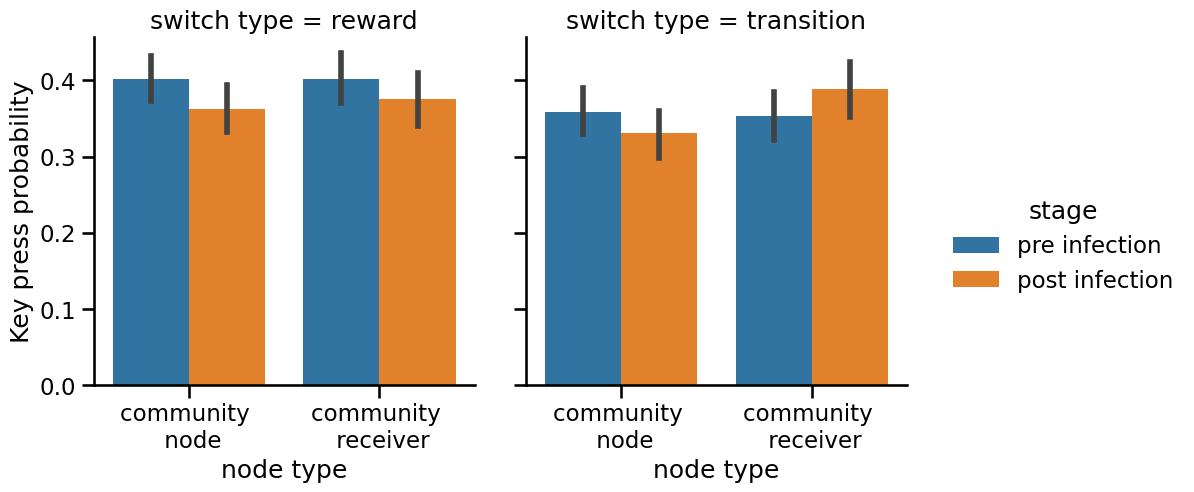

In [191]:
sns.set_context('talk')
g = sns.catplot(x = 'node type', y = 'key pressed',  col = 'switch type', hue = 'stage',
           data = data_parse_proportion, order = ['community node', 'community receiver'],
           kind = 'bar', margin_titles = True)
g.set(ylabel='Key press probability')
g.set_xticklabels(['community \n node', 'community \n receiver'])

In [55]:
data_parse_proportion['key_pressed'] = data_parse_proportion['key pressed']
data_parse_proportion['node_type'] = data_parse_proportion['node type']
data_parse_proportion['switch_type'] = data_parse_proportion['switch type']


In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('key_pressed ~ C(switch_type)*C(node_type)*C(stage)', 
         data = data_parse_proportion.loc[((data_parse_proportion['node type']=='community node') | (data_parse_proportion['node type'] == 'community receiver'))].reset_index()).fit()
table = sm.stats.anova_lm(lm, type=2)

In [59]:
table

,df,sum_sq,mean_sq,F,PR(>F)
C(switch_type),1.0,0.047539,0.047539,0.888207,0.346114
C(node_type),1.0,0.001979,0.001979,0.036982,0.847528
C(stage),1.0,0.009328,0.009328,0.174287,0.676389
C(switch_type):C(node_type),1.0,0.153995,0.153995,2.877224,0.090047
C(switch_type):C(stage),1.0,0.001507,0.001507,0.028153,0.866773
C(node_type):C(stage),1.0,0.192348,0.192348,3.593823,0.058185
C(switch_type):C(node_type):C(stage),1.0,0.152684,0.152684,2.852733,0.091425
Residual,1512.0,80.925113,0.053522,NaN,NaN


In [49]:
data_parse_proportion.loc[((data_parse_proportion['node type']=='community node') | (data_parse_proportion['node type'] == 'community receiver'))]

,p_no,boundary node?,node type,block no.,switch type,stage,index,stimulus_selector.thisRepN,stimulus_selector.thisTrialN,stimulus_selector.thisN,...,participant,session,frameRate,Unnamed: 95,parse_stim.stopped,parse_key_resp.stopped,parse_trial_instr.stopped,parse_feedback_txt.stopped,Unnamed: 99,key pressed
40,4,no,community node,1,reward,pre infection,9.000000,NaN,NaN,NaN,...,4.0,1.0,119.962305,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
41,4,no,community node,2,reward,pre infection,9.000000,NaN,NaN,NaN,...,4.0,1.0,119.962305,NaN,NaN,NaN,NaN,NaN,NaN,0.083333
42,4,no,community node,3,reward,pre infection,9.000000,NaN,NaN,NaN,...,4.0,1.0,119.962305,NaN,NaN,NaN,NaN,NaN,NaN,0.083333
43,4,no,community node,4,reward,pre infection,9.000000,NaN,NaN,NaN,...,4.0,1.0,119.962305,NaN,NaN,NaN,NaN,NaN,NaN,0.083333
44,4,no,community node,5,reward,pre infection,9.000000,NaN,NaN,NaN,...,4.0,1.0,119.962305,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,45,yes,community receiver,16,transition,post infection,7.333333,NaN,NaN,NaN,...,45.0,1.0,100.215618,NaN,NaN,NaN,NaN,NaN,NaN,0.333333
3776,45,yes,community receiver,17,transition,post infection,8.666667,NaN,NaN,NaN,...,45.0,1.0,100.215618,NaN,NaN,NaN,NaN,NaN,NaN,0.333333
3777,45,yes,community receiver,18,transition,post infection,8.666667,NaN,NaN,NaN,...,45.0,1.0,100.215618,NaN,NaN,NaN,NaN,NaN,NaN,0.333333
3778,45,yes,community receiver,19,transition,post infection,7.333333,NaN,NaN,NaN,...,45.0,1.0,100.215618,NaN,NaN,NaN,NaN,NaN,NaN,0.666667


In [76]:
data_choice.loc[((data_choice['node type'] == 'Reward infected node') & (data_choice['stage'] == 'post infection'))]

,index,stimulus,correct_answer,stimulus_selector.thisRepN,stimulus_selector.thisTrialN,stimulus_selector.thisN,stimulus_selector.thisIndex,trials.thisRepN,trials.thisTrialN,trials.thisN,...,parse_key_resp.stopped,parse_trial_instr.stopped,parse_feedback_txt.stopped,Unnamed: 99,block no.,switch type,boundary node?,post transition node,node type,stage
940,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21,reward,no,no,Reward infected node,post infection
943,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21,reward,no,no,Reward infected node,post infection
960,13.0,stimuli/13.png,l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21,reward,no,no,Reward infected node,post infection
965,13.0,stimuli/13.png,l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21,reward,no,no,Reward infected node,post infection
969,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22,reward,no,no,Reward infected node,post infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28,transition,no,no,Reward infected node,post infection
1188,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29,transition,no,no,Reward infected node,post infection
1191,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29,transition,no,no,Reward infected node,post infection
1242,2.0,stimuli/2.png,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30,transition,no,no,Reward infected node,post infection
